In [3]:
import pandas as pd
df = pd.read_csv("./NASA_Exoplanet_dataset.csv", comment='#')
df.head()

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.21000,0.06000,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,3.20000,...,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.76000,0.11000,...,-0.7140,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.03890,1.67709,...,-0.0073,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.50000,1.00000,...,-0.0111,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603


In [4]:
df.columns

Index(['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod',
       'disc_year', 'disc_facility', 'pl_controv_flag', 'pl_orbper',
       'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax',
       'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade',
       'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1',
       'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1',
       'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1',
       'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol',
       'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1',
       'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2',
       'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 

In [5]:
EARTH_DENSITY = 5.51
SUN_TEMP = 5772

df["pl_density"] = (df["pl_bmasse"] / (df["pl_rade"]**3))
df["st_luminosity"] = (df["st_rad"]**2) * (df["st_teff"] / SUN_TEMP)**4

In [6]:
cols = [
    "pl_name",
    "hostname",
    "pl_rade",
    "pl_bmasse",
    "pl_density",
    "pl_eqt",
    "pl_orbper",
    "pl_orbsmax",
    "pl_insol",
    "st_teff",
    "st_luminosity",
    "st_mass",
    "st_rad",
    "st_met",
    "st_spectype"
]

df_feat = df[cols].copy()
df_feat.head()


,pl_name,hostname,pl_rade,pl_bmasse,pl_density,pl_eqt,pl_orbper,pl_orbsmax,pl_insol,st_teff,st_luminosity,st_mass,st_rad,st_met,st_spectype
0,11 Com b,11 Com,12.2,4914.898486,2.706668,NaN,323.21000,1.178,NaN,4874.0,96.266166,2.09,13.76,-0.2600,G8 III
1,11 UMi b,11 UMi,12.3,4684.814200,2.517544,NaN,516.21997,1.530,NaN,4213.0,251.884564,2.78,29.79,-0.0200,K4 III
2,14 And b,14 And,13.1,1131.151301,0.503161,NaN,186.76000,0.775,NaN,4888.0,68.609376,1.78,11.55,-0.2100,K0 III
3,14 Her b,14 Her,12.6,2559.472162,1.279496,NaN,1765.03890,2.774,NaN,5338.0,0.632667,0.91,0.93,0.4052,K0V
4,16 Cyg B b,16 Cyg B,13.5,565.737400,0.229940,NaN,798.50000,1.660,NaN,5750.0,1.257543,1.08,1.13,0.0600,G3 V


In [7]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6052 entries, 0 to 6051
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pl_name        6052 non-null   object 
 1   hostname       6052 non-null   object 
 2   pl_rade        6027 non-null   float64
 3   pl_bmasse      6021 non-null   float64
 4   pl_density     6003 non-null   float64
 5   pl_eqt         4514 non-null   float64
 6   pl_orbper      5737 non-null   float64
 7   pl_orbsmax     5749 non-null   float64
 8   pl_insol       4247 non-null   float64
 9   st_teff        5776 non-null   float64
 10  st_luminosity  5751 non-null   float64
 11  st_mass        6045 non-null   float64
 12  st_rad         5754 non-null   float64
 13  st_met         5522 non-null   float64
 14  st_spectype    2231 non-null   object 
dtypes: float64(12), object(3)
memory usage: 709.3+ KB


In [8]:
num_cols = [
    "pl_rade",
    "pl_bmasse",
    "pl_eqt",
    "pl_density",
    "pl_orbper",
    "pl_orbsmax",
    "st_luminosity",
    "pl_insol",
    "st_teff",
    "st_mass",
    "st_rad",
    "st_met",
]

df_feat[num_cols] = df_feat[num_cols].fillna(df_feat[num_cols].mean())
df_feat.isnull().sum()

pl_name             0
hostname            0
pl_rade             0
pl_bmasse           0
pl_density          0
pl_eqt              0
pl_orbper           0
pl_orbsmax          0
pl_insol            0
st_teff             0
st_luminosity       0
st_mass             0
st_rad              0
st_met              0
st_spectype      3821
dtype: int64

In [9]:
df_feat.duplicated().sum()

0

In [10]:
df_feat["st_spectype"] = df_feat["st_spectype"].fillna(
    df_feat["st_spectype"].mode()[0]
)


In [11]:
df_feat.head()

,pl_name,hostname,pl_rade,pl_bmasse,pl_density,pl_eqt,pl_orbper,pl_orbsmax,pl_insol,st_teff,st_luminosity,st_mass,st_rad,st_met,st_spectype
0,11 Com b,11 Com,12.2,4914.898486,2.706668,915.727918,323.21000,1.178,423.137208,4874.0,96.266166,2.09,13.76,-0.2600,G8 III
1,11 UMi b,11 UMi,12.3,4684.814200,2.517544,915.727918,516.21997,1.530,423.137208,4213.0,251.884564,2.78,29.79,-0.0200,K4 III
2,14 And b,14 And,13.1,1131.151301,0.503161,915.727918,186.76000,0.775,423.137208,4888.0,68.609376,1.78,11.55,-0.2100,K0 III
3,14 Her b,14 Her,12.6,2559.472162,1.279496,915.727918,1765.03890,2.774,423.137208,5338.0,0.632667,0.91,0.93,0.4052,K0V
4,16 Cyg B b,16 Cyg B,13.5,565.737400,0.229940,915.727918,798.50000,1.660,423.137208,5750.0,1.257543,1.08,1.13,0.0600,G3 V


In [12]:
import numpy as np
num_cols = [
    "pl_rade",
    "pl_bmasse",
    "pl_eqt",
    "pl_density",
    "pl_orbper",
    "pl_orbsmax",
    "st_luminosity",
    "pl_insol",
    "st_teff",
    "st_mass",
    "st_rad",
    "st_met",
]
Q1 = df_feat[num_cols].quantile(0.25)
Q3 = df_feat[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outlier_mask = (df_feat[num_cols] < lower) | (df_feat[num_cols] > upper)

print("Outliers BEFORE replacement (original IQR):")
for col in num_cols:
    print(col, "outliers:", outlier_mask[col].sum())
for col in num_cols:
    median = df_feat[col].median()
    df_feat.loc[outlier_mask[col], col] = median

outlier_mask_after = (df_feat[num_cols] < lower) | (df_feat[num_cols] > upper)

print("\nOutliers AFTER replacement (using original IQR bounds):")
for col in num_cols:
    print(col, "outliers:", outlier_mask_after[col].sum())


Outliers BEFORE replacement (original IQR):
pl_rade outliers: 6
pl_bmasse outliers: 966
pl_eqt outliers: 479
pl_density outliers: 407
pl_orbper outliers: 1192
pl_orbsmax outliers: 1190
st_luminosity outliers: 765
pl_insol outliers: 459
st_teff outliers: 358
st_mass outliers: 438
st_rad outliers: 337
st_met outliers: 274

Outliers AFTER replacement (using original IQR bounds):
pl_rade outliers: 0
pl_bmasse outliers: 0
pl_eqt outliers: 0
pl_density outliers: 0
pl_orbper outliers: 0
pl_orbsmax outliers: 0
st_luminosity outliers: 0
pl_insol outliers: 0
st_teff outliers: 0
st_mass outliers: 0
st_rad outliers: 0
st_met outliers: 0


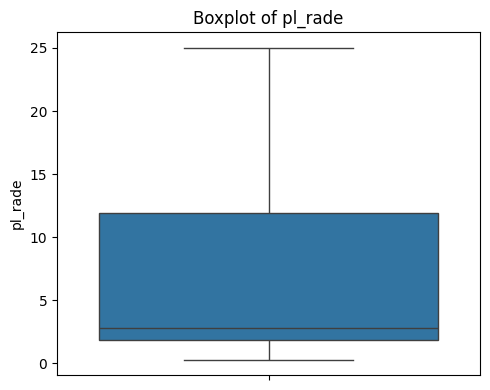

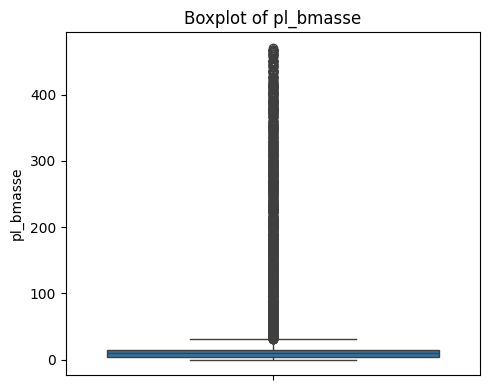

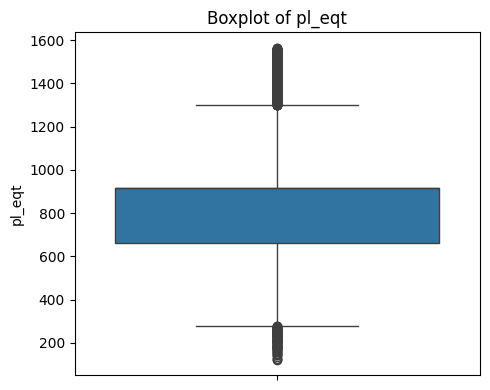

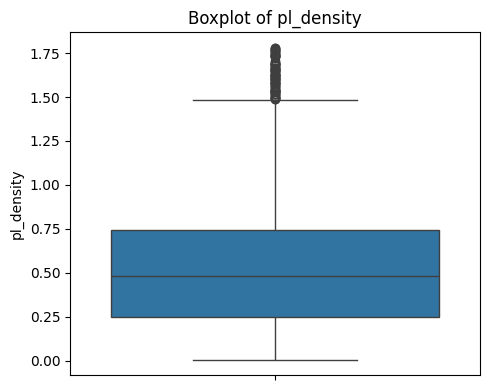

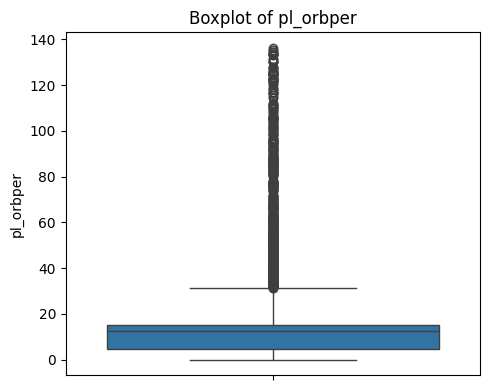

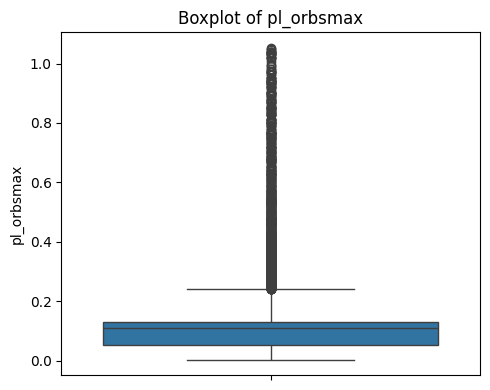

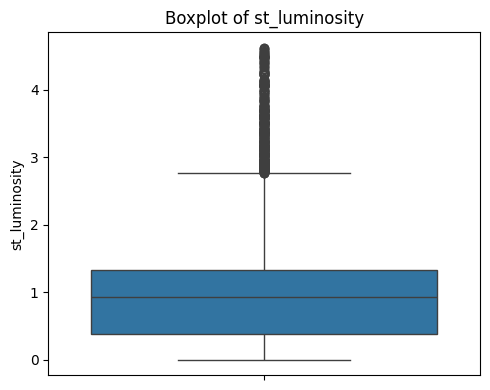

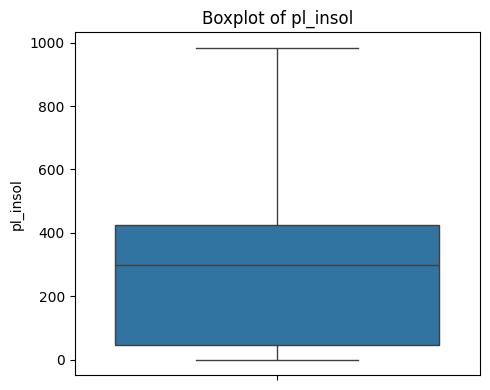

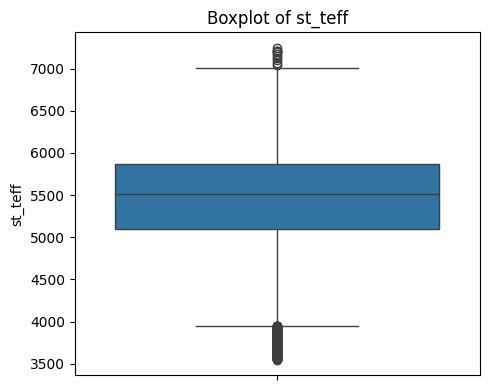

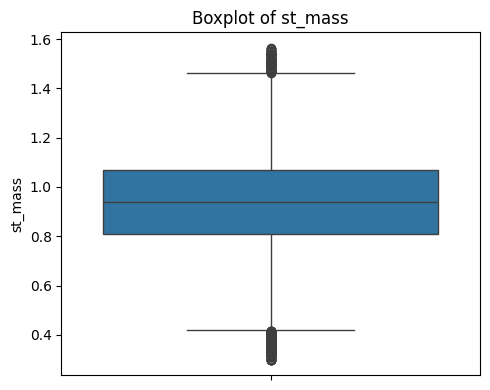

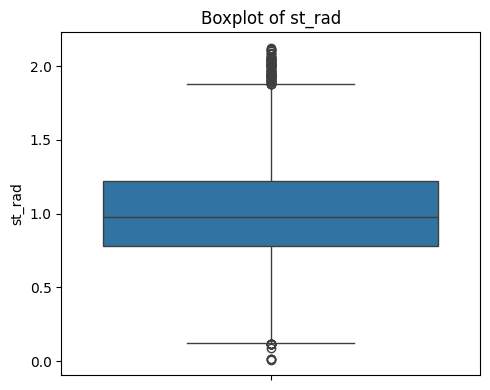

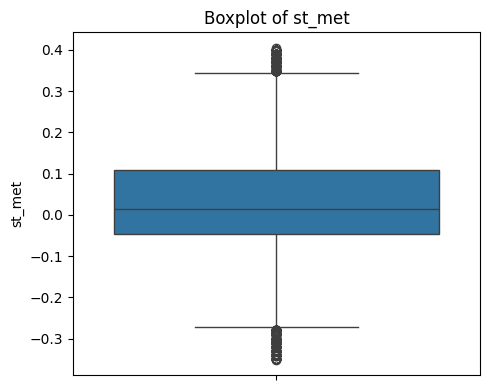

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols =  [
    "pl_rade",
    "pl_bmasse",
    "pl_eqt",
    "pl_density",
    "pl_orbper",
    "pl_orbsmax",
    "st_luminosity",
    "pl_insol",
    "st_teff",
    "st_mass",
    "st_rad",
    "st_met",
]

for col in num_cols:
    plt.figure(figsize=(5, 4))
    sns.boxplot(y=df_feat[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()


In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

habitability_features = [
    "pl_rade",      # radius
    "pl_density",   # density (you created earlier)
    "pl_eqt",       # equilibrium temperature
    "pl_orbsmax",   # semi-major axis
]

df_feat[habitability_features] = scaler.fit_transform(
    df_feat[habitability_features]
)
df_feat["habitability_score"] = (
    0.30 * (1 - (df_feat["pl_rade"]    - 0.5).abs()) +
    0.30 * (1 - (df_feat["pl_density"] - 0.5).abs()) +
    0.25 * (1 - (df_feat["pl_eqt"]     - 0.5).abs()) +
    0.15 * (1 - (df_feat["pl_orbsmax"] - 0.5).abs())
)
threshold = 0.75  # or some value based on domain logic
df_feat["habitability_class"] = (df_feat["habitability_score"] >= threshold).astype(int)


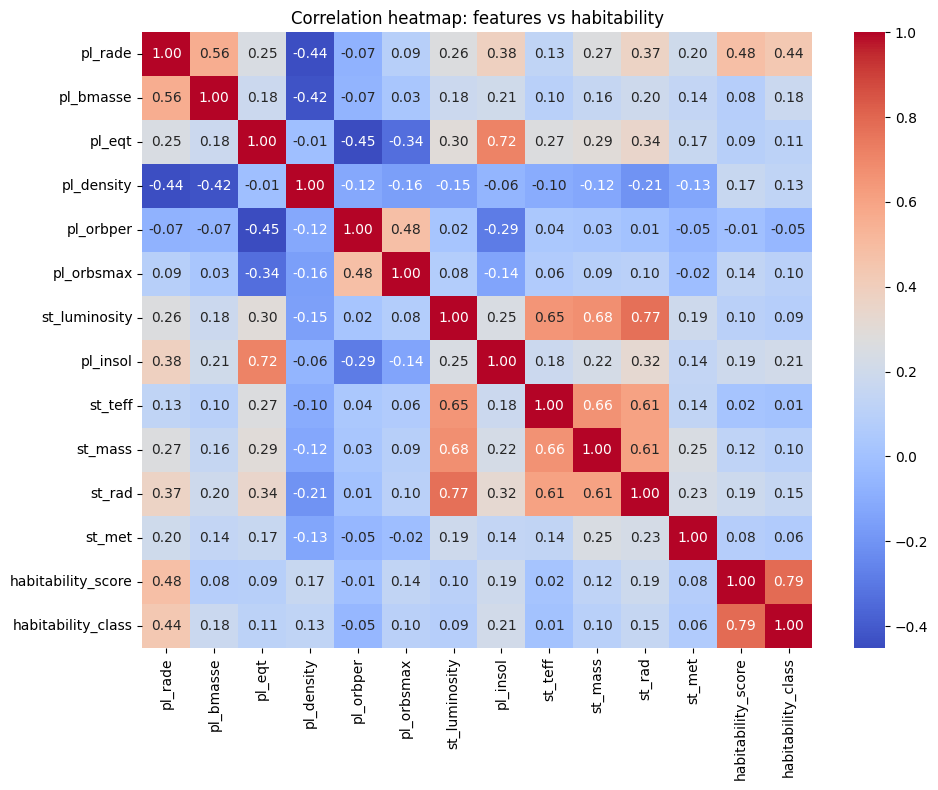

In [15]:
# overwrite feature_cols with only existing columns
feature_cols =  [
    "pl_rade",
    "pl_bmasse",
    "pl_eqt",
    "pl_density",
    "pl_orbper",
    "pl_orbsmax",
    "st_luminosity",
    "pl_insol",
    "st_teff",
    "st_mass",
    "st_rad",
    "st_met",
]

cols_for_heatmap = feature_cols + ["habitability_score", "habitability_class"]

corr = df_feat[cols_for_heatmap].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap: features vs habitability")
plt.tight_layout()
plt.show()


In [16]:
# counts
print(df_feat["habitability_class"].value_counts())

# percentages
print(df_feat["habitability_class"].value_counts(normalize=True) * 100)


habitability_class
0    3876
1    2176
Name: count, dtype: int64
habitability_class
0    64.044944
1    35.955056
Name: proportion, dtype: float64


In [17]:
from sklearn.utils import resample

df_major = df_feat[df_feat["habitability_class"] == 0]
df_minor = df_feat[df_feat["habitability_class"] == 1]

df_minor_up = resample(
    df_minor,
    replace=True,
    n_samples=len(df_major),
    random_state=42,
)

df_balanced = pd.concat([df_major, df_minor_up]).sample(frac=1, random_state=42).reset_index(drop=True)

print(df_balanced["habitability_class"].value_counts())


habitability_class
1    3876
0    3876
Name: count, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# use only numeric columns as features
num_features = [
    "pl_rade","pl_bmasse","pl_eqt","pl_density",
    "pl_orbper","pl_orbsmax","st_luminosity",
    "pl_insol","st_teff","st_mass","st_rad","st_met"
]

X = df_balanced[num_features]      # or df_feat if you skip balancing
y = df_balanced["habitability_class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

model.fit(X_train, y_train)

print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))


Train accuracy: 0.7698758264796001
Test accuracy: 0.7627337201805287


In [19]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# numeric features only
num_features = [
    "pl_rade","pl_bmasse","pl_eqt","pl_density",
    "pl_orbper","pl_orbsmax","st_luminosity",
    "pl_insol","st_teff","st_mass","st_rad","st_met"
]

X_train_num = X_train[num_features]
X_test_num  = X_test[num_features]

models = {
    "RandomForest": RandomForestClassifier(
        n_estimators=200,
        max_depth=8,          # limit tree depth
        min_samples_split=20,
        min_samples_leaf=10,
        max_features=0.5,
        random_state=42,
        class_weight="balanced"
    ),
    "XGBoost": XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        max_depth=3,
        learning_rate=0.05,
        n_estimators=150,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        random_state=42
    ),
}

results = []

for name, clf in models.items():
    clf.fit(X_train_num, y_train)
    y_pred = clf.predict(X_test_num)
    y_prob = clf.predict_proba(X_test_num)[:, 1]

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    auc  = roc_auc_score(y_test, y_prob)

    results.append([name, acc, prec, rec, f1, auc])

results_df = pd.DataFrame(
    results,
    columns=["model", "accuracy", "precision", "recall", "f1", "roc_auc"]
).sort_values("accuracy", ascending=False)

print(results_df)


          model  accuracy  precision    recall        f1   roc_auc
1       XGBoost  0.958092   0.945980  0.971613  0.958625  0.991965
0  RandomForest  0.956157   0.943538  0.970323  0.956743  0.991718


In [20]:
for name, clf in models.items():
    clf.fit(X_train_num, y_train)
    y_pred_train = clf.predict(X_train_num)
    y_pred_test  = clf.predict(X_test_num)

    print(name)
    print("Train acc:", accuracy_score(y_train, y_pred_train))
    print("Test  acc:", accuracy_score(y_test, y_pred_test))
    print("-" * 30)


RandomForest
Train acc: 0.9774229962909208
Test  acc: 0.9561573178594455
------------------------------
XGBoost
Train acc: 0.9703273665537816
Test  acc: 0.9580915538362347
------------------------------


In [21]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

xgb = models["XGBoost"]   # get the XGBoost model from your dict

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(
    xgb,
    X[num_features],   # full balanced dataset with numeric features
    y,
    cv=cv,
    scoring="accuracy"
)

print("XGBoost CV mean accuracy:", scores.mean())
print("XGBoost CV std:", scores.std())


XGBoost CV mean accuracy: 0.9598820324036522
XGBoost CV std: 0.0029714437184607495


In [22]:
sample = {
    "pl_rade": 1.0,        # Earth radii
    "pl_bmasse": 1.0,      # Earth masses
    "pl_eqt": 288,         # ~Earth temp (K) but match your scale if needed
    "pl_density": 5.5,     # Earth density
    "pl_orbper": 365.25,   # days
    "pl_orbsmax": 1.0,     # AU
    "st_luminosity": 1.0,  # Sun-like
    "pl_insol": 1.0,       # Earth-like insolation
    "st_teff": 5772,       # Sun temperature
    "st_mass": 1.0,        # solar masses
    "st_rad": 1.0,         # solar radii
    "st_met": 0.0          # solar metallicity
}
sample_df = pd.DataFrame([sample])[num_features]   # num_features is your 12-col list
xgb = models["XGBoost"]      # already defined and trained

pred_class = xgb.predict(sample_df)[0]
pred_prob  = xgb.predict_proba(sample_df)[0, 1]

label = "Habitable" if pred_class == 1 else "Not habitable"

print("Predicted label:", label)
print("Probability of habitable (class 1):", pred_prob)


Predicted label: Habitable
Probability of habitable (class 1): 0.7887544


In [23]:
import joblib

# 🔑 Make sure this model is ALREADY trained
# clf.fit(X_train, y_train) must have run before this

# Save trained model
joblib.dump(clf, "habitability_model.pkl")

# Save feature order EXACTLY as used during training
feature_names = [
    "pl_rade",
    "pl_bmasse",
    "pl_eqt",
    "pl_density",
    "pl_orbper",
    "pl_orbsmax",
    "st_luminosity",
    "pl_insol",
    "st_teff",
    "st_mass",
    "st_rad",
    "st_met"
]

joblib.dump(feature_names, "model_features.pkl")

print("✅ habitability_model.pkl saved")
print("✅ model_features.pkl saved")


✅ habitability_model.pkl saved
✅ model_features.pkl saved
